In [1]:
!pip install ctgan table-evaluator

In [2]:
from ctgan import CTGAN
import matplotlib.pyplot as plt
import pandas as pd
from table_evaluator import TableEvaluator
from sklearn.model_selection import train_test_split
from google.colab import files

In [3]:
uploaded = files.upload()
df = pd.read_csv("diabetes_data.csv")

Saving diabetes_data.csv to diabetes_data.csv


In [4]:
df = df.drop(columns=["PatientID", "DoctorInCharge"], errors="ignore")
df = df.dropna()
discrete_columns = [col for col in df.columns if df[col].nunique() < 10]
if "Diagnosis" not in discrete_columns:
    discrete_columns.append("Diagnosis")

In [5]:
train_data, _ = train_test_split(df, test_size=0.2, random_state=42)

In [6]:
ctgan = CTGAN(epochs=10)
ctgan.fit(train_data, discrete_columns=discrete_columns)

In [7]:
synthetic_data = ctgan.sample(len(train_data))

In [8]:
numerical_cols = train_data.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = [
    col for col in train_data.columns
    if train_data[col].nunique() < 10 and col not in numerical_cols
]

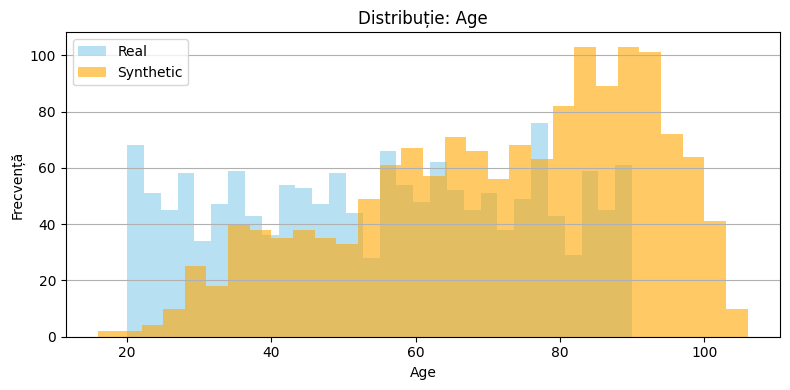

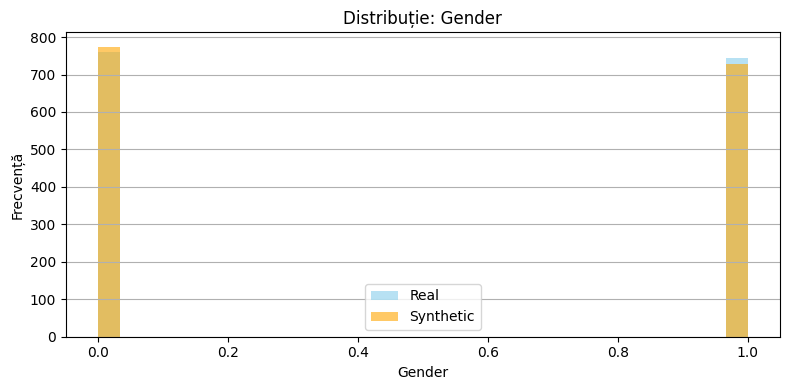

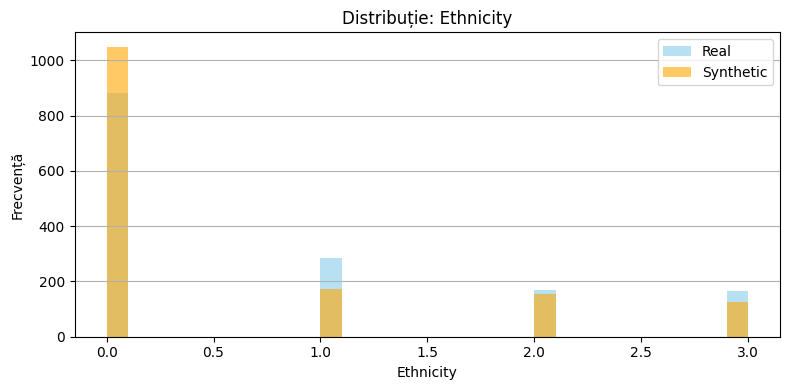

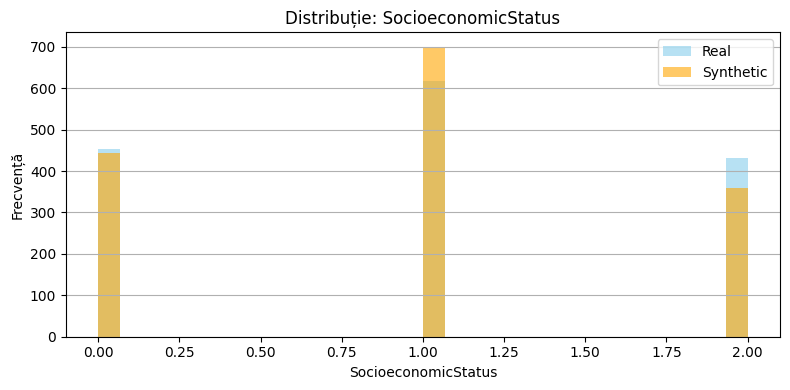

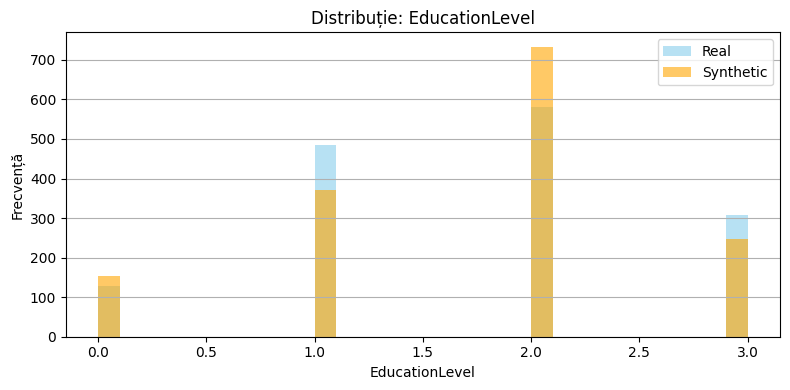

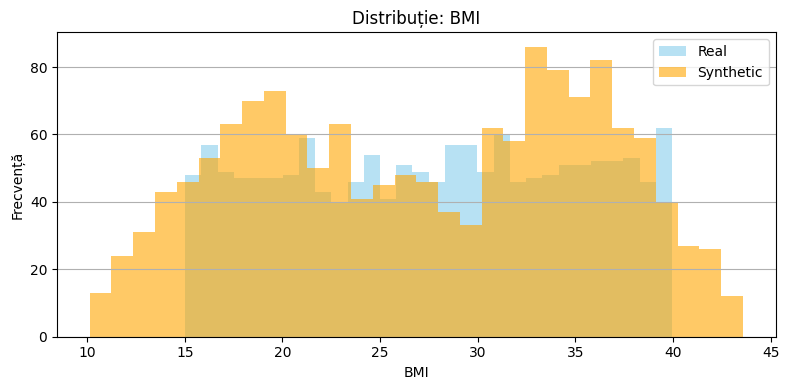

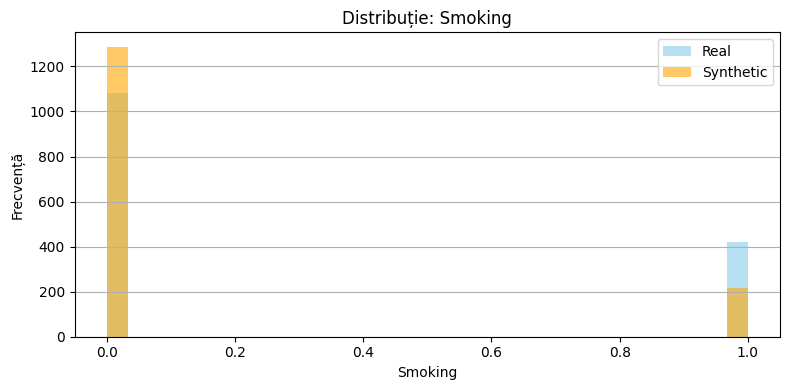

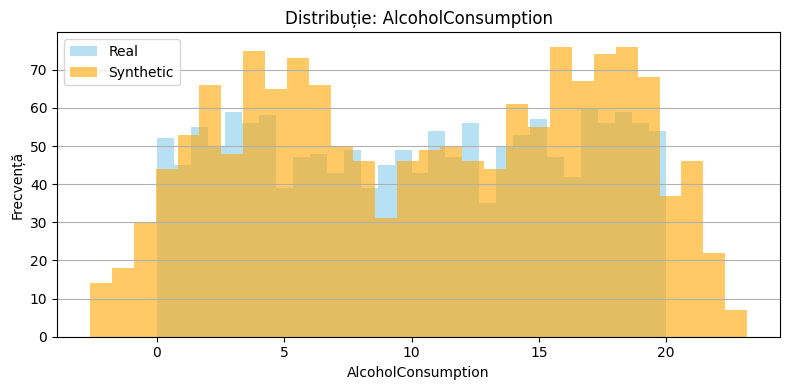

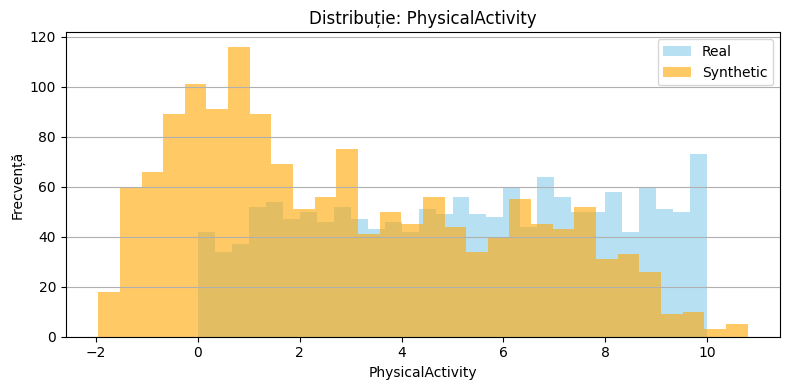

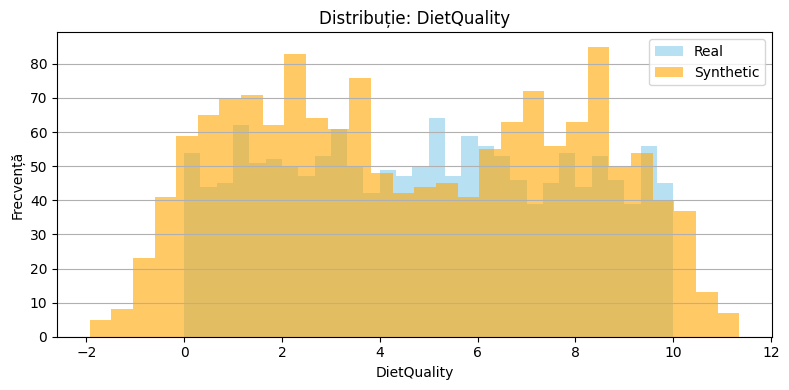

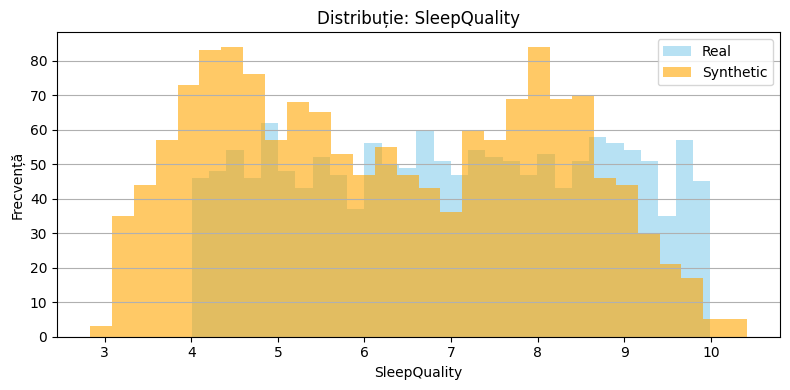

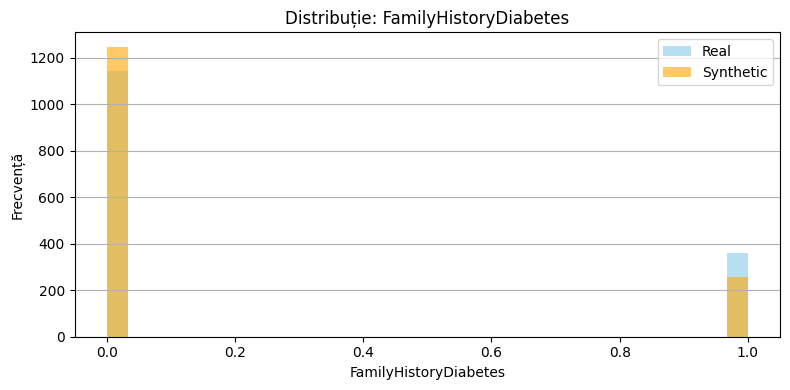

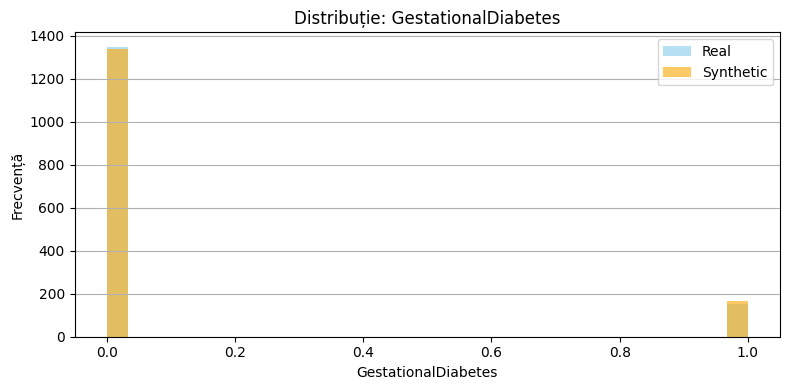

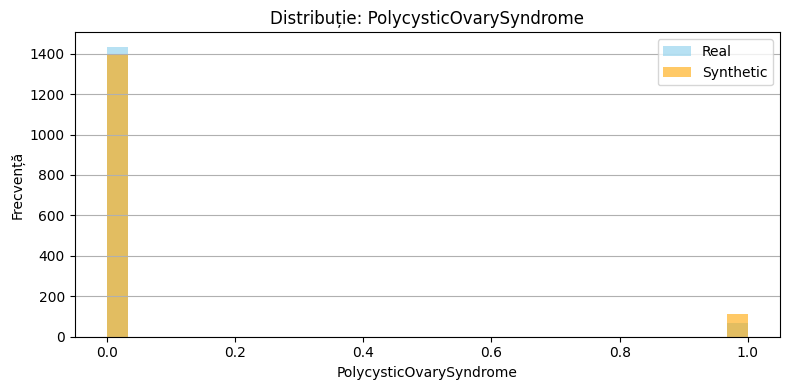

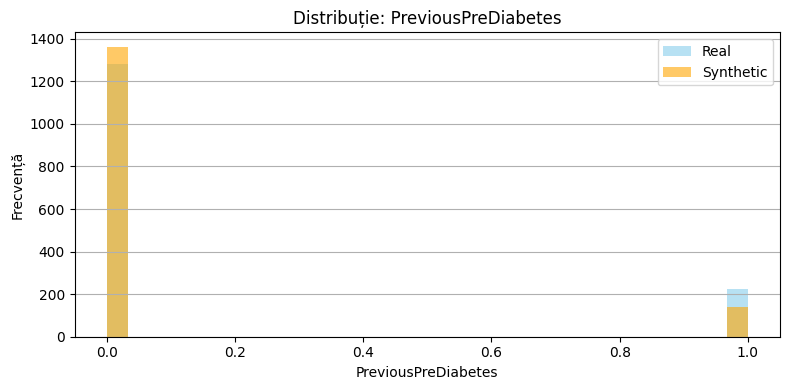

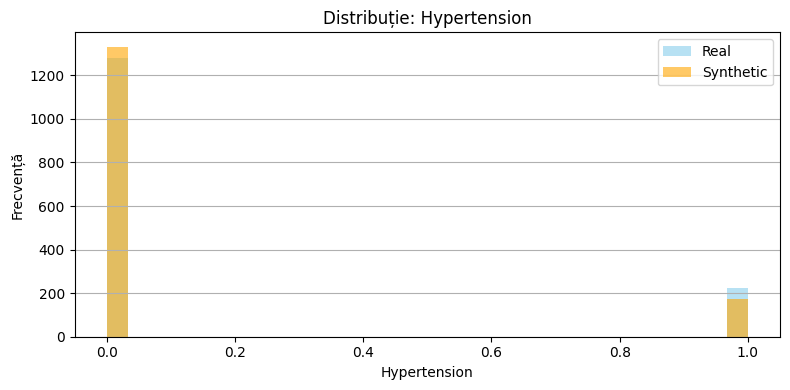

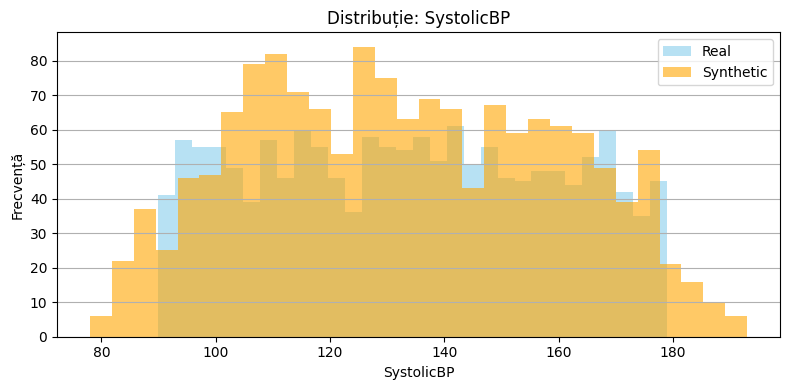

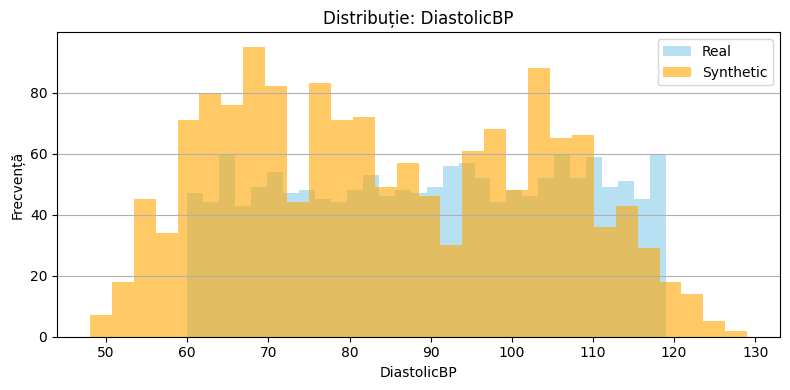

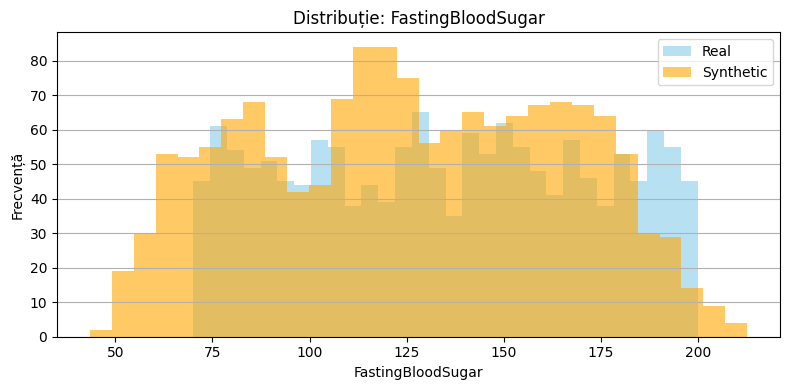

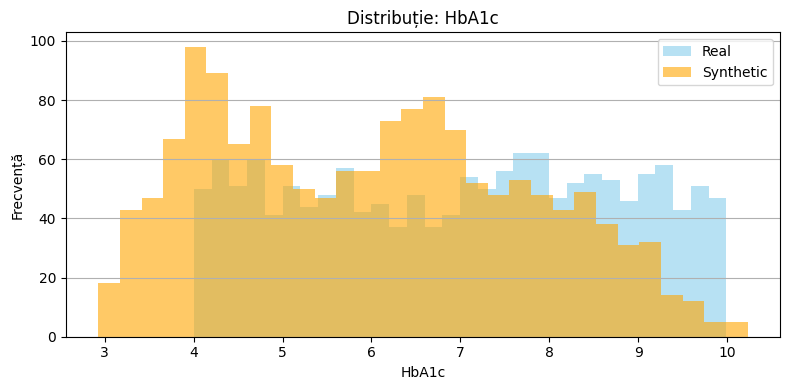

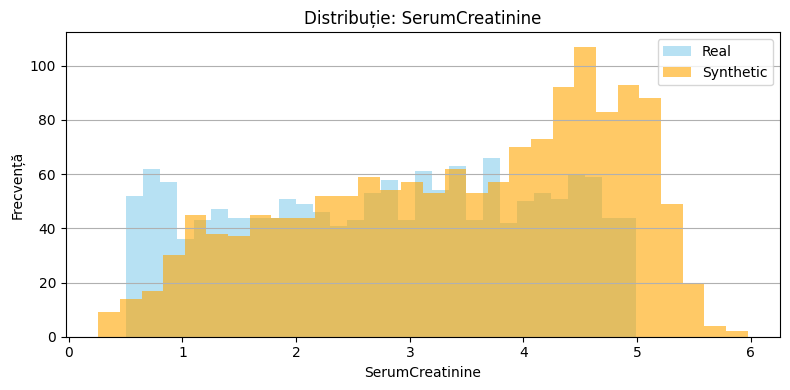

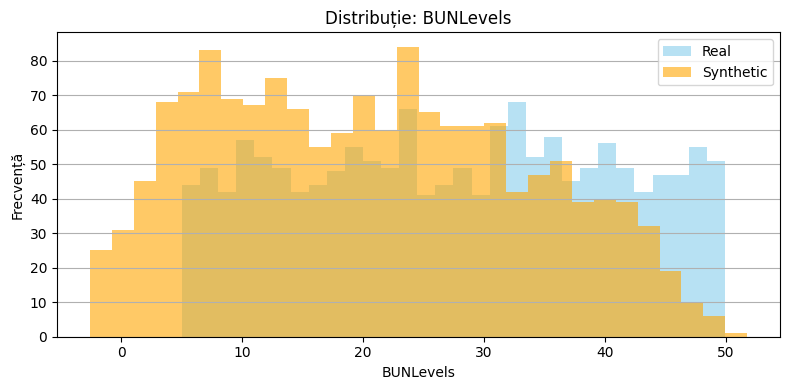

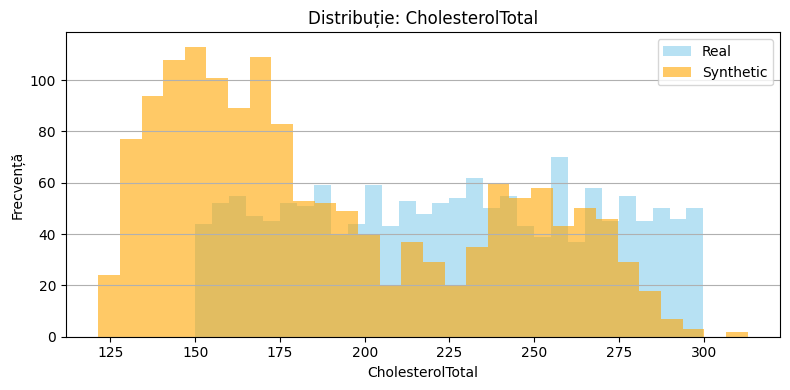

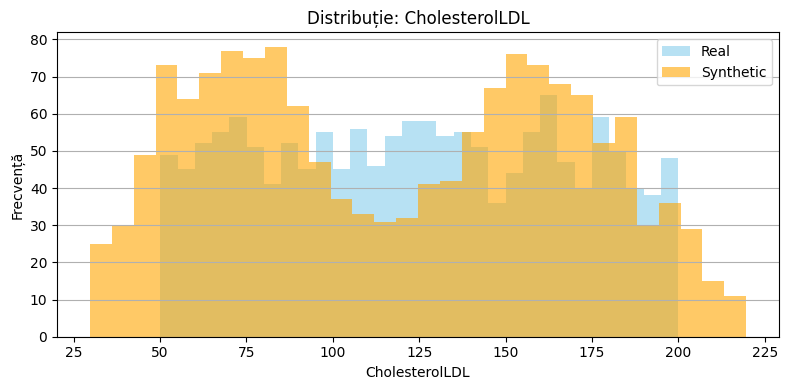

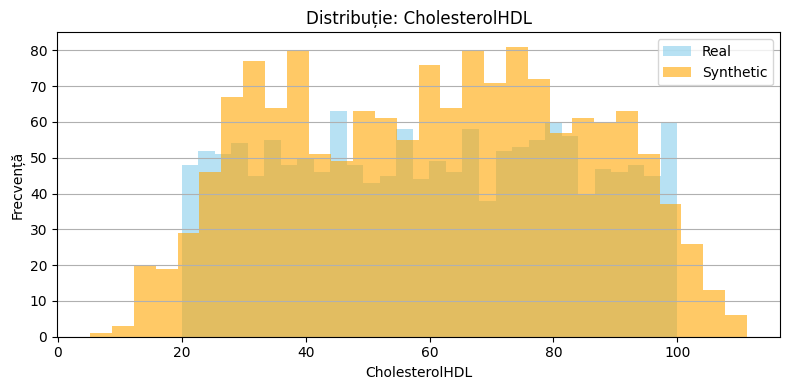

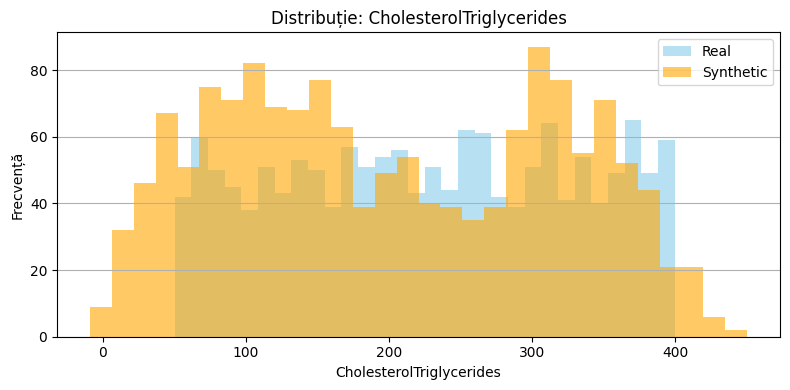

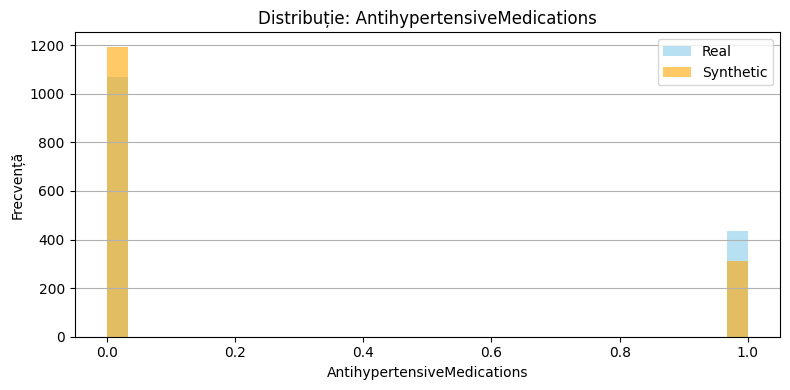

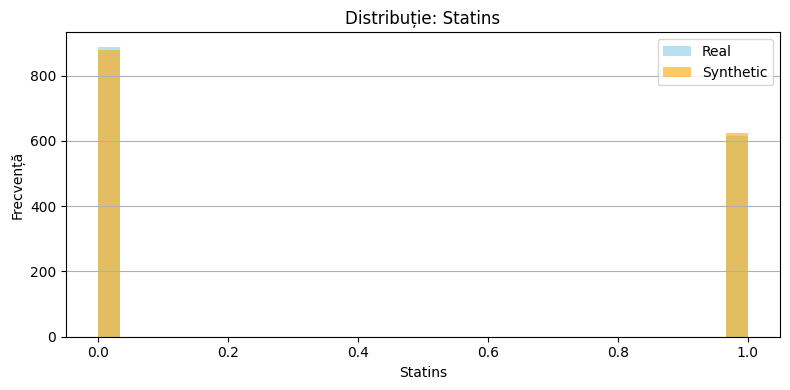

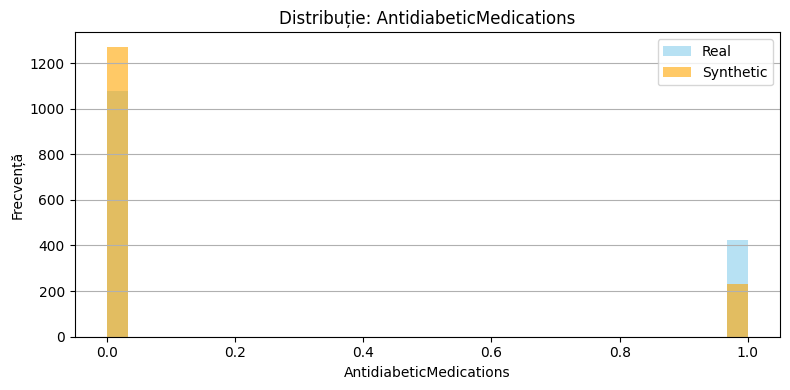

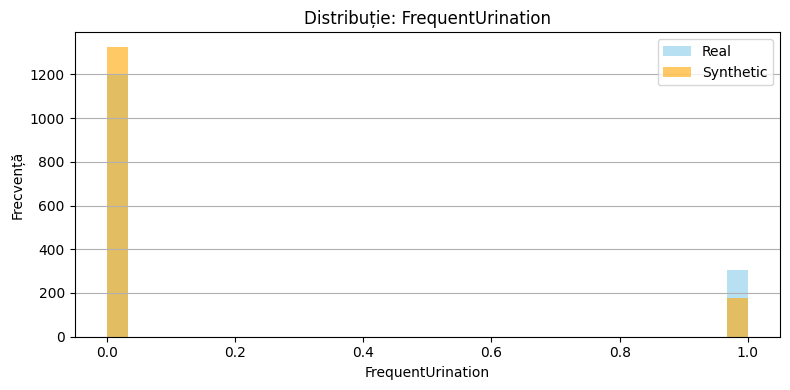

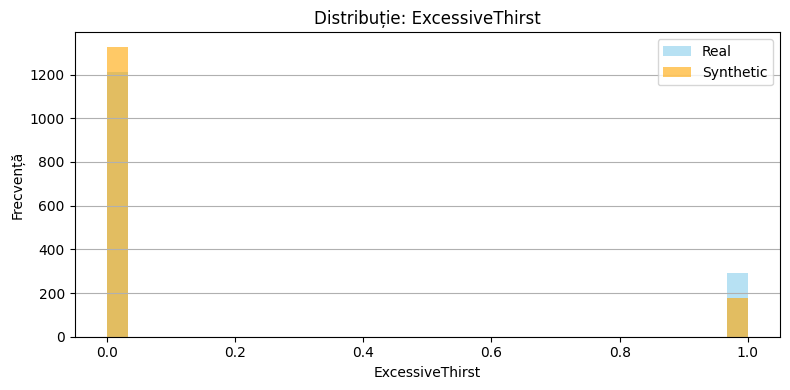

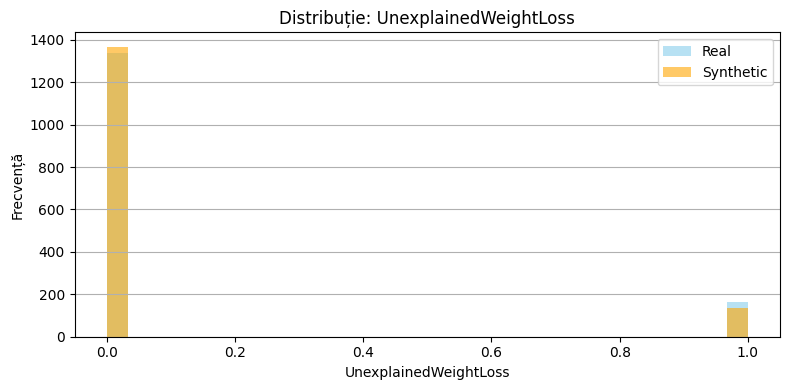

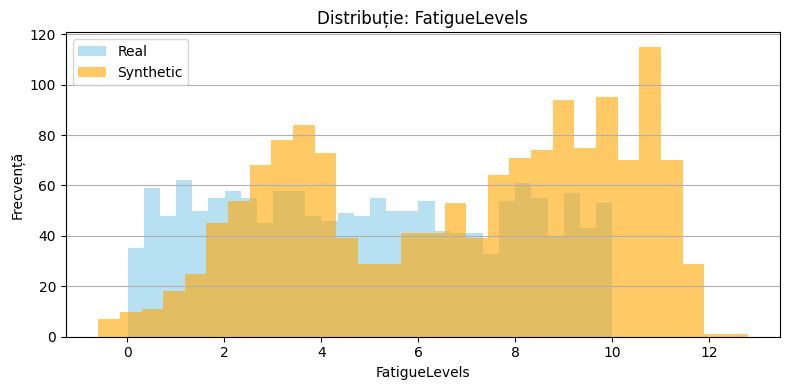

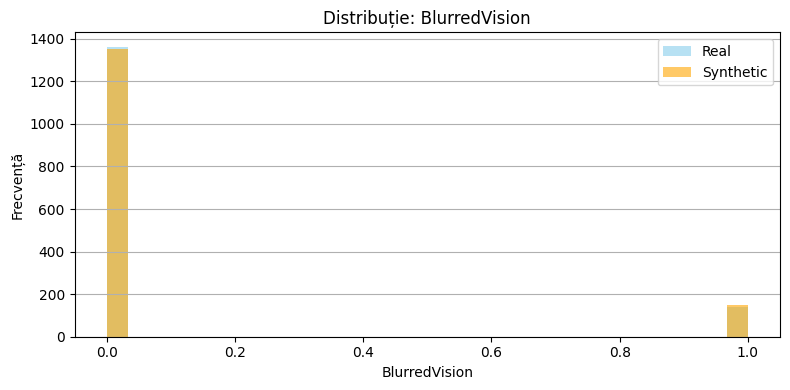

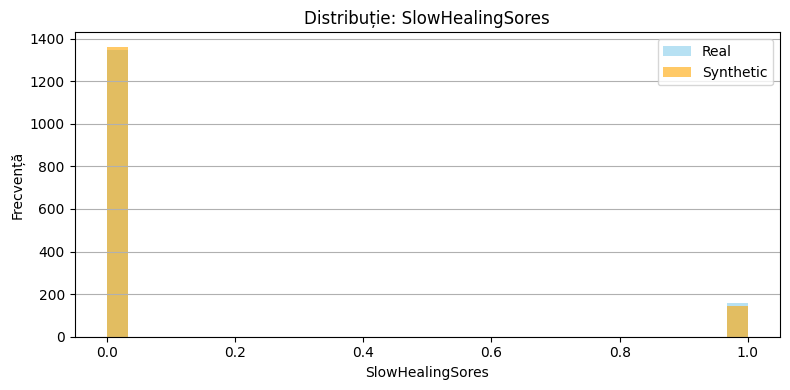

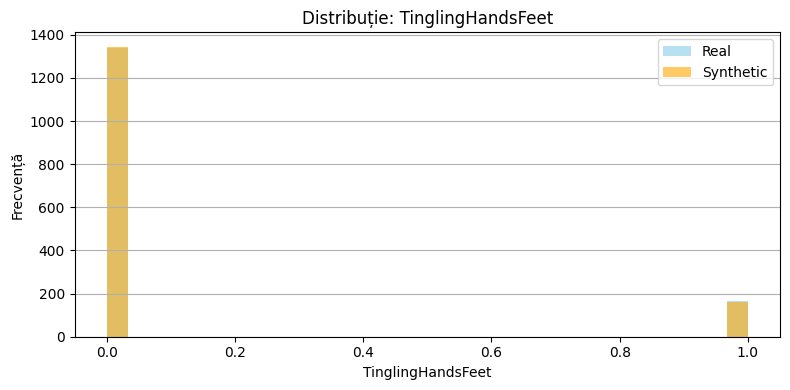

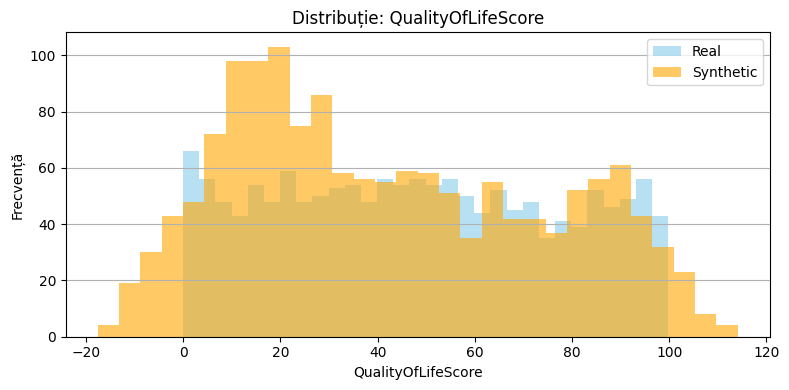

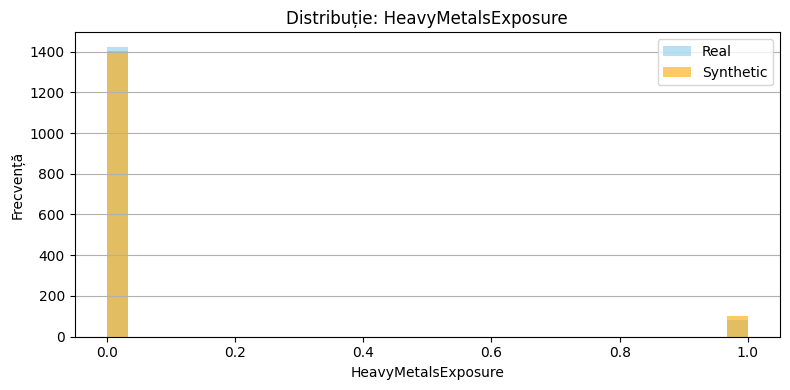

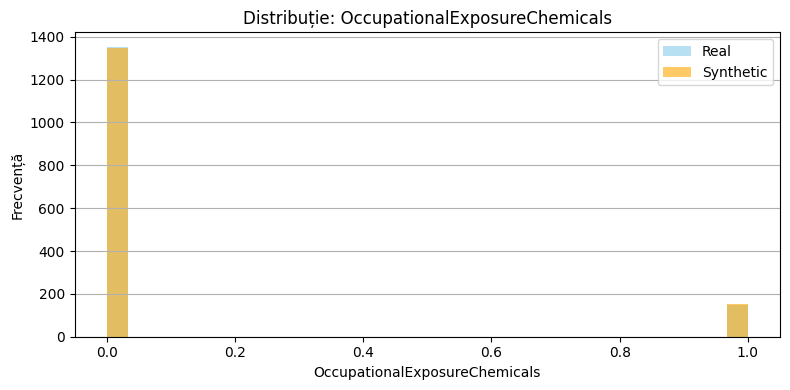

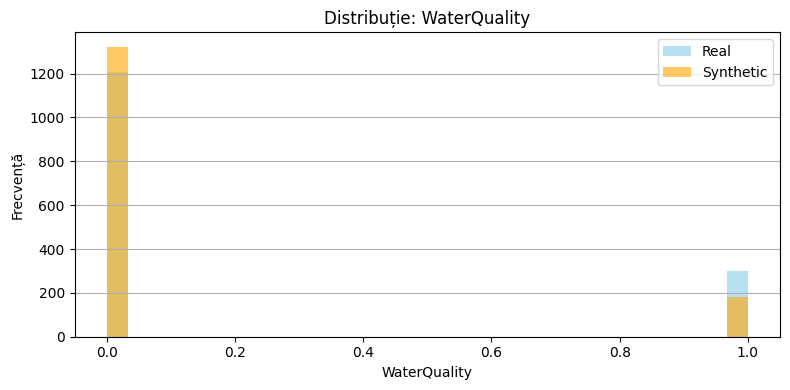

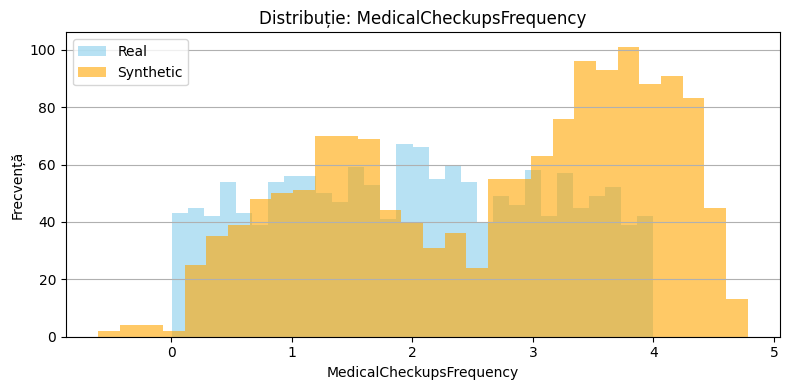

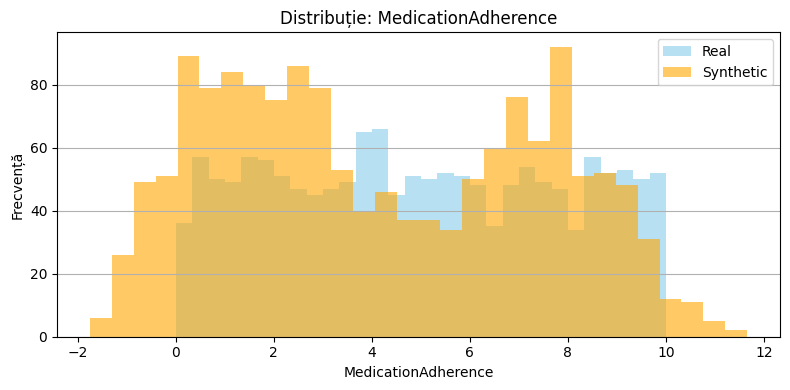

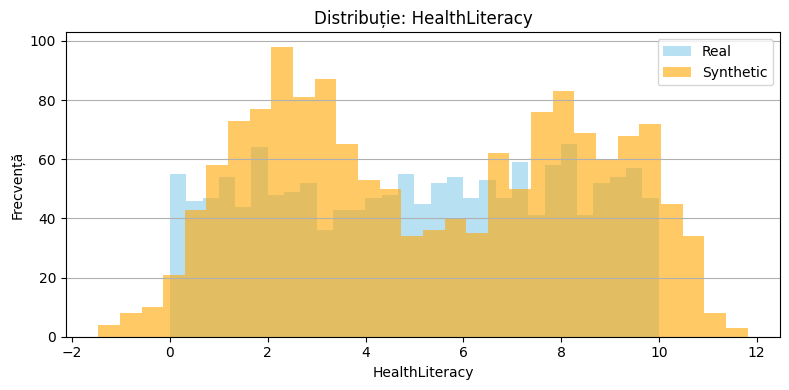

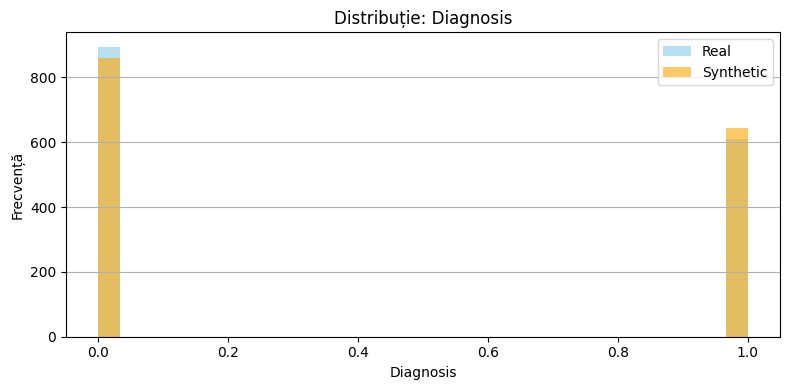

In [9]:
for col in numerical_cols:
    plt.figure(figsize=(8, 4))
    plt.hist(train_data[col], bins=30, alpha=0.6, label='Real', color='skyblue')
    plt.hist(synthetic_data[col], bins=30, alpha=0.6, label='Synthetic', color='orange')
    plt.title(f"Distribuție: {col}")
    plt.xlabel(col)
    plt.ylabel("Frecvență")
    plt.legend()
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()

In [10]:
from table_evaluator import load_data, TableEvaluator

In [11]:
cat_cols = ['PatientID', 'Age', 'Gender', 'Ethnicity', 'SocioeconomicStatus', 'EducationLevel','BMI', 'Smoking', 'AlcoholConsumption', 'PhysicalActivity', 'DietQuality', 'SleepQuality', 'FamilyHistoryDiabetes', 'GestationalDiabetes''PolycysticOvarySyndrome', 'PreviousPreDiabetes', 'Hypertension', 'SystolicBP', 'DiastolicBP', 'FastingBloodSugar', 'HbA1c', 'SerumCreatinine', 'BUNLevels', 'CholesterolTotal', 'CholesterolLDL', 'CholesterolHDL', 'CholesterolTriglycerides', 'AntihypertensiveMedications', 'Statins', 'AntidiabeticMedications', 'FrequentUrination', 'ExcessiveThirst', 'UnexplainedWeightLoss', 'FatigueLevels', 'QualityOfLifeScore', 'MedicalCheckupsFrequency', 'MedicationAdherence', 'HealthLiteracy']

In [12]:
print(len(df), len(synthetic_data))
table_evaluator =  TableEvaluator(df, synthetic_data)

1879 1503


In [13]:
df = pd.read_csv('diabetes_data.csv')

In [14]:
import numpy as np
numeric_df = df.select_dtypes(include=[np.number]).drop(columns=["PatientID"])

In [15]:
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform
import seaborn as sns
import matplotlib.pyplot as plt

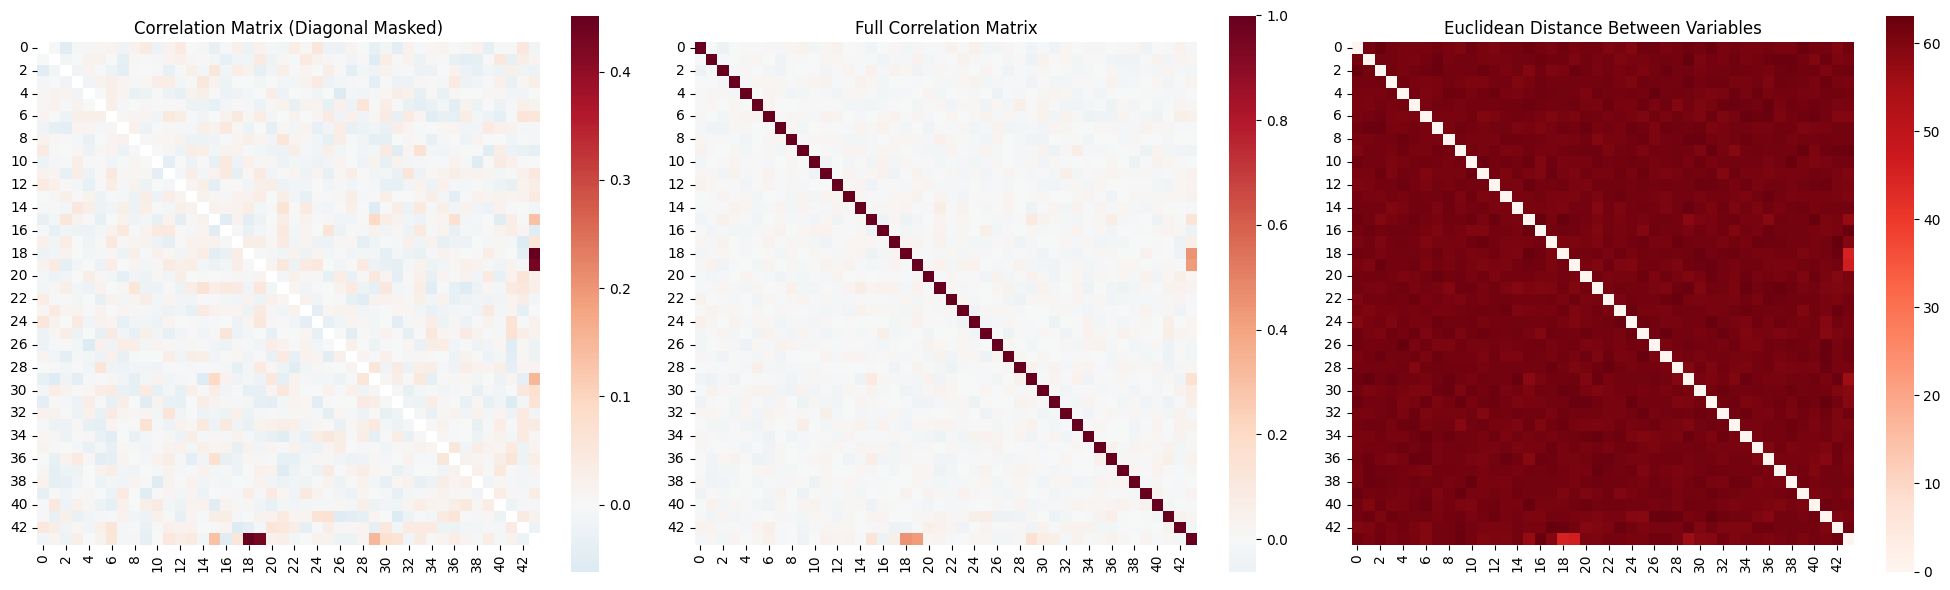

In [16]:
scaled_data = StandardScaler().fit_transform(numeric_df)

corr_matrix = np.corrcoef(scaled_data, rowvar=False)

distance_matrix = squareform(pdist(scaled_data.T, metric='euclidean'))

mask_diag = np.eye(corr_matrix.shape[0], dtype=bool)
masked_corr = np.copy(corr_matrix)
masked_corr[mask_diag] = np.nan

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

sns.heatmap(masked_corr, ax=axes[0], cmap="RdBu_r", center=0, square=True, cbar=True)
axes[0].set_title("Correlation Matrix (Diagonal Masked)")

sns.heatmap(corr_matrix, ax=axes[1], cmap="RdBu_r", center=0, square=True, cbar=True)
axes[1].set_title("Full Correlation Matrix")

sns.heatmap(distance_matrix, ax=axes[2], cmap="Reds", square=True, cbar=True)
axes[2].set_title("Euclidean Distance Between Variables")

plt.tight_layout()
plt.show()

In [ ]:
df_real = pd.read_csv("diabetes_data.csv")

In [ ]:
df_real_numeric = df_real.select_dtypes(include=["int64", "float64"]).drop(columns=["PatientID"], errors="ignore")

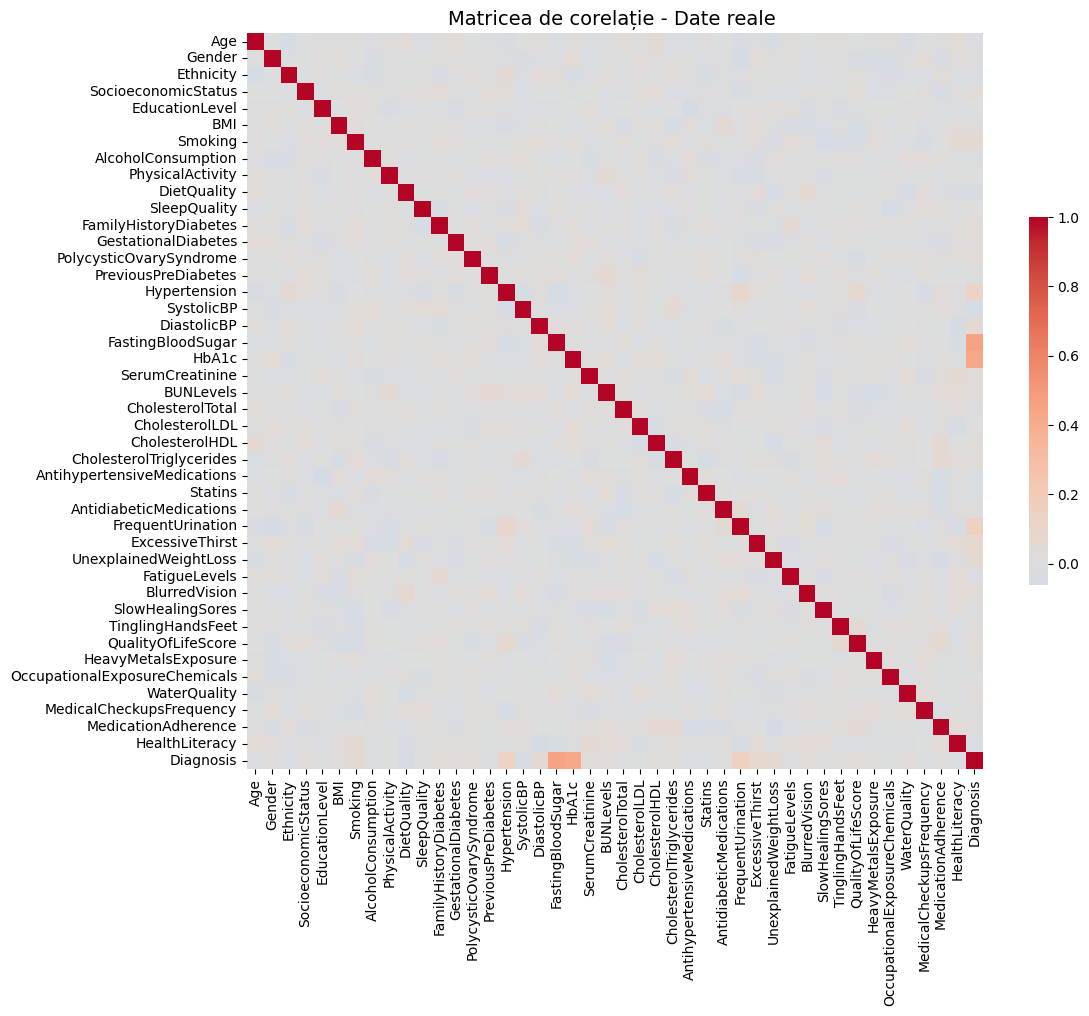

In [ ]:
real_corr = df_real_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(real_corr, cmap="coolwarm", center=0, square=True, annot=False, cbar_kws={'shrink': 0.5})
plt.title("Matricea de corelație - Date reale ", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
synthetic_df = synthetic_data

In [ ]:
synthetic_numeric = synthetic_df.select_dtypes(include=['int64', 'float64']).drop(columns=['PatientID'], errors='ignore')

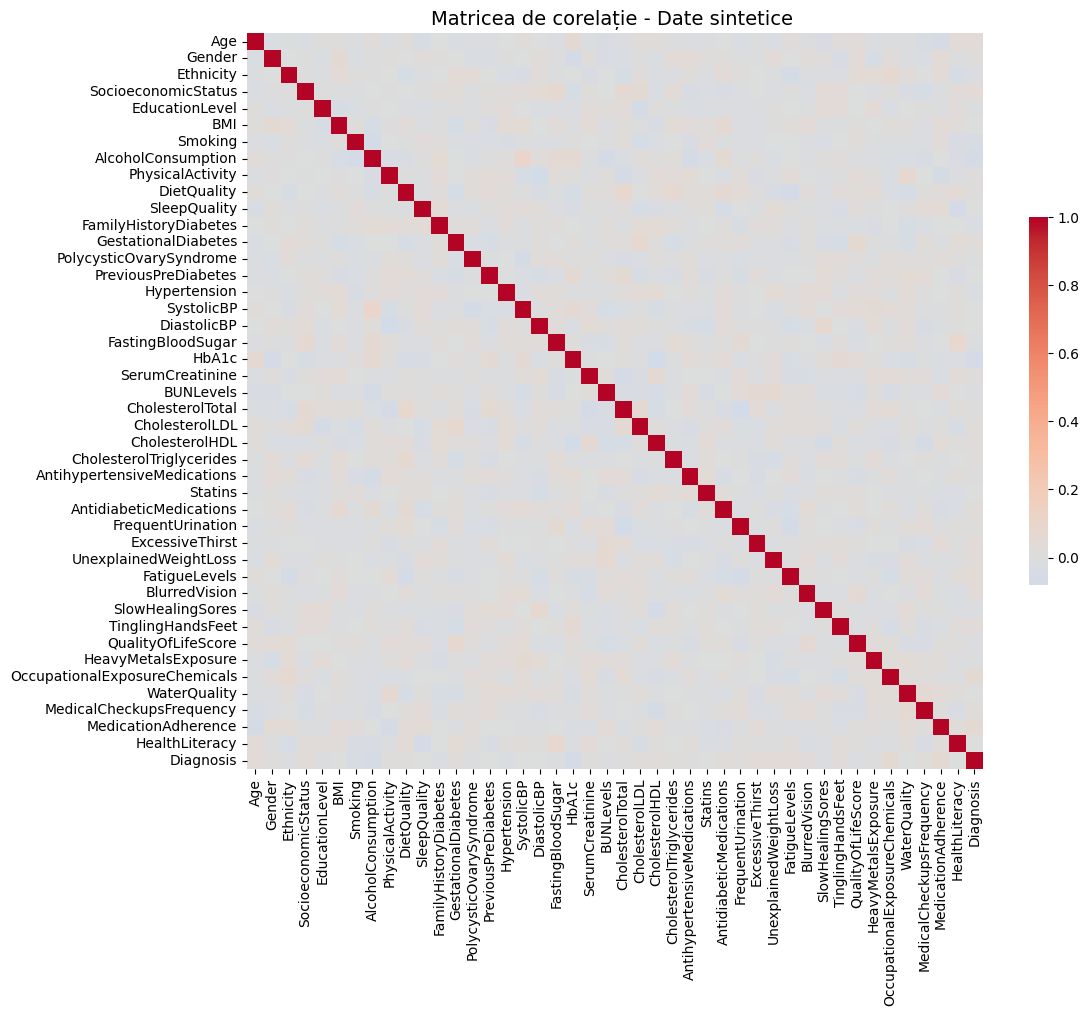

In [ ]:
synthetic_corr = synthetic_numeric.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(synthetic_corr, cmap='coolwarm', center=0, square=True, cbar_kws={'shrink': 0.5}, annot=False)
plt.title('Matricea de corelație - Date sintetice ', fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
real_corr = numeric_df.corr()
synthetic_corr = synthetic_numeric.corr()

In [ ]:
correlation_diff = real_corr - synthetic_corr

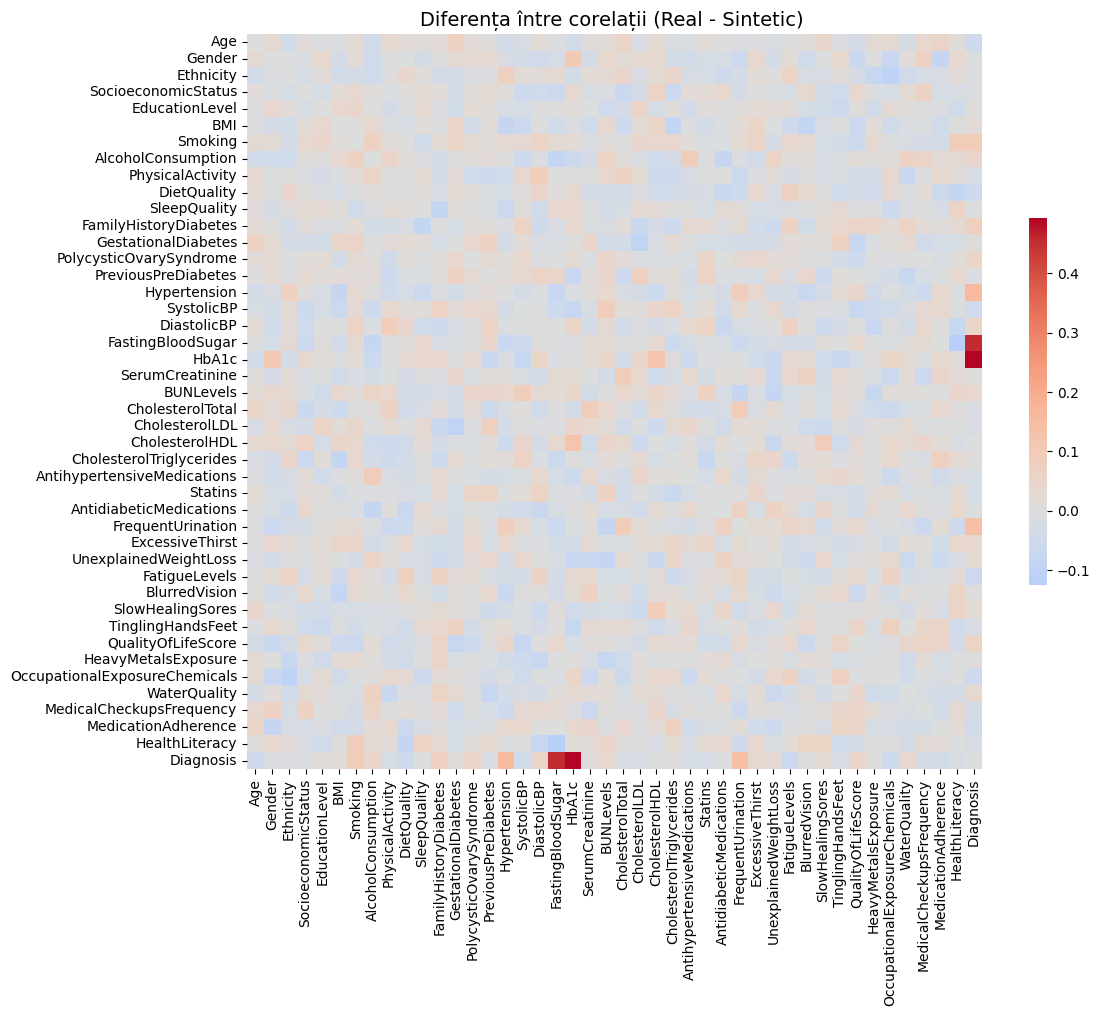

In [ ]:
diff_corr = real_corr - synthetic_corr

plt.figure(figsize=(12, 10))
sns.heatmap(diff_corr, cmap="coolwarm", center=0, square=True, annot=False, cbar_kws={'shrink': 0.5})
plt.title("Diferența între corelații (Real - Sintetic) ", fontsize=14)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

valid_diff = corr_diff.values.flatten()
valid_diff = valid_diff[~np.isnan(valid_diff)]

rmse = np.sqrt(mean_squared_error(np.zeros_like(valid_diff), valid_diff))
mae = mean_absolute_error(np.zeros_like(valid_diff), valid_diff)

In [ ]:
scoruri_df = pd.DataFrame({
    "Metric": ["RMSE intre corelatii", "MAE intre corelatii"],
    "Value": [rmse, mae]
})
scoruri_df.to_csv("scoruri_diferente_corelatii.csv", index=False)

In [ ]:
real_corr.to_csv("correlatie_reale.csv")
synthetic_corr.to_csv("correlatie_sintetice.csv")
diff_corr.to_csv("diferenta_corelatii.csv")

files.download("correlatie_reale.csv")
files.download("correlatie_sintetice.csv")
files.download("diferenta_corelatii.csv")
files.download("scoruri_diferente_corelatii.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

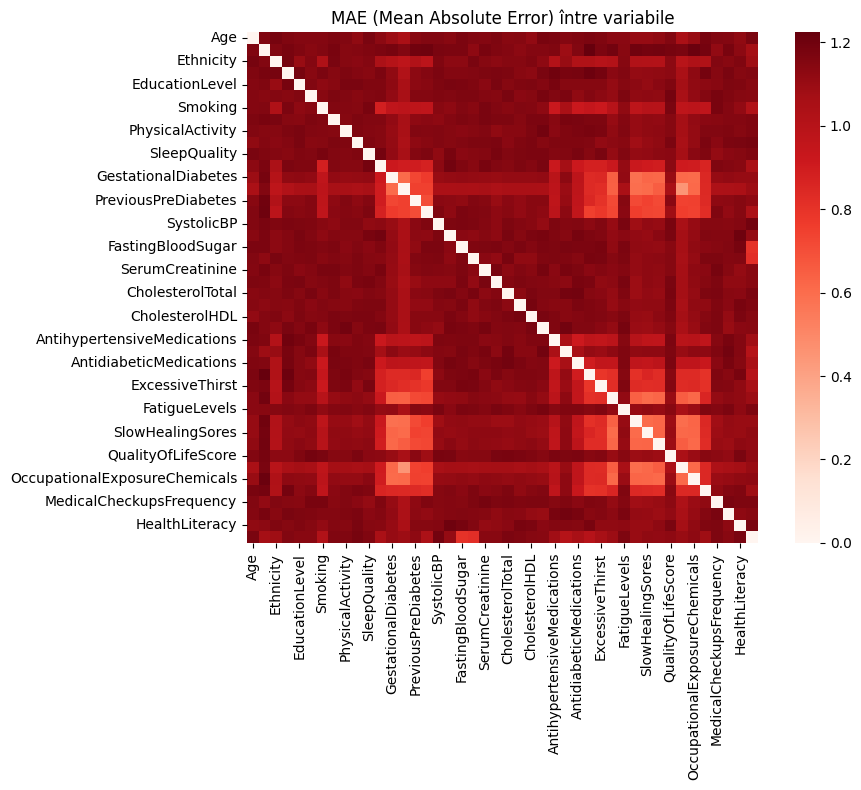


🔍 Top 10 cele mai similare perechi de variabile (MAE mic):
PolycysticOvarySyndrome  HeavyMetalsExposure              0.448174
GestationalDiabetes      BlurredVision                    0.588819
PolycysticOvarySyndrome  BlurredVision                    0.596779
BlurredVision            HeavyMetalsExposure              0.600081
GestationalDiabetes      OccupationalExposureChemicals    0.607393
UnexplainedWeightLoss    SlowHealingSores                 0.607426
GestationalDiabetes      PolycysticOvarySyndrome          0.607459
BlurredVision            SlowHealingSores                 0.607494
PolycysticOvarySyndrome  SlowHealingSores                 0.611095
HeavyMetalsExposure      OccupationalExposureChemicals    0.612973
dtype: float64

🚨 Top 10 cele mai diferite perechi de variabile (MAE mare):
Gender                    FrequentUrination                1.224196
                          OccupationalExposureChemicals    1.209954
SocioeconomicStatus       FrequentUrination               

In [50]:
scaled_data = StandardScaler().fit_transform(numeric_df)

n = scaled_data.shape[1]
mae_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        mae_matrix[i, j] = mean_absolute_error(scaled_data[:, i], scaled_data[:, j])

mae_df = pd.DataFrame(mae_matrix, index=numeric_df.columns, columns=numeric_df.columns)

plt.figure(figsize=(10, 8))
sns.heatmap(mae_df, cmap="Reds", square=True, cbar=True)
plt.title("MAE (Mean Absolute Error) între variabile")
plt.tight_layout()
plt.show()

mae_upper = mae_df.where(np.triu(np.ones(mae_df.shape), k=1).astype(bool))

most_similar = mae_upper.stack().sort_values(ascending=True).head(10)
print("\n🔍 Top 10 cele mai similare perechi de variabile (MAE mic):")
print(most_similar)

most_different = mae_upper.stack().sort_values(ascending=False).head(10)
print("\n🚨 Top 10 cele mai diferite perechi de variabile (MAE mare):")
print(most_different)